# CMSE/MTH 314 - Final Exam
This is an open internet exam.  Feel free to use anything on the internet with one important exception...

- **DO NOT** communicate live with other people during the exam (either verbally or on-line).  The goal here is to find answers to problems as you would in the real world.  

Please use paper provided at the front of the room to show your work.  Add your name to the upper right corner of **each page** and put the problem number on the upper left. 

You will be given **60 minutes (wishful thinking by the instructor, you will be given the entire exam time if needed)** to complete this test.  Use your time wisely. 

**HINTS:**
- Neatness is important.  we will ignore all notes or code we can not read.
- Read the entire exam from beginning to end before starting.  Not all questions are equal in points vs. time so plan your time accordingly.   
- Skip questions you can not answer. 
- Some of the information provided my be a distraction. Do not assume you need to understand everything written to answer the questions. 
- Spaces for answers are provided. However, do not assume that the answer must be in the same format of the cell provided. Feel free to change the cell formatting (ex. markdown to code) or add additional cells as needed to provide your answer.
- When we say "in your own words" it is still okay to search the Internet for the answer as a reminder, however, we would like you to do more than cut and paste.  Make the answer your own. 
- If you get stuck, try not to leave an answer blank. It is better to include some notes or stub functions so we have an idea about your thinking process so we can give you partial credit.   
- When you are done, restart the entire notebook and run from beginning to end and make sure your answers still match what you expect.  This will ensure you didn't do anything out of order by mistake. 

### Exam Summary
1. (25 points) Forward Kinematics 
2. (25 points) Markov's Bookstore
2. (25 points) Symmetric Positive-Definite Matrices
3. (25 points) Cryptography

----
# Question 1 - (25 points) Forward Kinematics 

<img src="https://3c1703fe8d.site.internapcdn.net/newman/csz/news/800/2016/foursynchron.gif" width="30%">
   

The following code models the sun, earth, moon and mars as perfectly circular orbits.  Day zero is at a time when the sun, earth, moon and mars all line up in a strait line.  Review the code and answer the provided questions.

NOTE: Simulation not quite to scale. Points are plotted based on radius of body in km while distances to sun are plotted based on millions of km (see notes in code).  Even at this scale, the earth and moon can not be distinguished in the plot.

In [1]:
# Here are some libraries you may need to use
%matplotlib inline
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
sym.init_printing(use_unicode=True)

In [2]:
from ipywidgets import interact
from mpl_toolkits.mplot3d import Axes3D

def Robot_Simulator(time_days=0, show=True):
    
    #Convert time (in days) into angles based on orbits. 
    earth_orbit = time_days/365.25 * (2* np.pi)
    moon_orbit = time_days/27 * (2*np.pi)
    mars_orbit = time_days/687 * (2*np.pi)
    
    #Radius of object (km)
    names = ['moon','earth', 'sun', 'mars']
    R = [1.737, 6.371, 695.5, 3.389]
    
    #Distances (Millions of km)
    D1 = 0.3844 #(Moon to Earth)
    D2 = 149.6 #(Earth to Sun)
    D3 = 227.9 #(Mars to Sun)

    #Transform moon coordates to earth
    A3 = np.matrix([[1, 0, D1 ], 
                    [0, 1,  0 ], 
                    [0, 0, 1]])
    
    #Rotate moon and around earth and Transform Earth to Sun
    A2 = np.matrix([[np.cos(moon_orbit), -np.sin(moon_orbit), D2 ], 
                    [np.sin(moon_orbit), np.cos(moon_orbit),  0 ], 
                    [0, 0, 1]])   
    
    #Rotate Earth around Sun
    A1 = np.matrix([[np.cos(earth_orbit), -np.sin(earth_orbit), 0 ], 
                [np.sin(earth_orbit), np.cos(earth_orbit),  0 ], 
                [0, 0, 1]])
    

    #First point is the moon
    m = np.matrix([[0,0,1]]).T 
    
    #Propogate points though the simulation
    p = np.concatenate((A3*m, np.matrix([0,0,1]).T), axis=1 )
    p = np.concatenate((A2*p, np.matrix([0,0,1]).T), axis=1 )
    p = A1*p

    #S = A1*A2*A3*m

    #Transform Mars Coordinates to Sun
    B2 = np.matrix([[1, 0, D3 ], 
                [0, 1,  0 ], 
                [0, 0, 1]])
    
    #Rotate Mars around the Sun
    B1 = np.matrix([[np.cos(mars_orbit), -np.sin(mars_orbit), 0 ], 
                [np.sin(mars_orbit), np.cos(mars_orbit),  0 ], 
                [0, 0, 1]])

    #Propogate point though simulation
    r = np.matrix([[0,0,1]]).T 
    p2 = B1*B2*r
       
    #S = B2*B2*M
    
    #Combine Earth/Moon points with Mars points
    p = np.concatenate((p, p2 ), axis=1 )
                       
    if show:
        fig = plt.figure()
        ax = fig.gca()
        plt.scatter(p[0,:].tolist()[0],(p[1,:]).tolist()[0], s = R,  facecolors=['black', 'blue','yellow', 'red'], edgecolors=['black', 'blue','yellow','red'])
        #ax.scatter(5,0,0, s=200, facecolors='r', edgecolors='r')

        #Plot Mars
        
        #ax.plot(p[0,:].tolist()[0],(p[1,:]).tolist()[0])
        #ax.set_xlim([-H1,H1])
        #ax.set_ylim([-H1,H1])
        ax.set_xlabel('x-axis');
        ax.set_ylabel('y-axis'); 
        ax.axis('equal')

        plt.show()

    return names,p
    
target = interact(Robot_Simulator, time_days=(0,10000));

interactive(children=(IntSlider(value=0, description='time_days', max=10000), Checkbox(value=True, description…

The following code will show the plot the status of the solar system for any day you pick and return the point location for the celestial bodies. For example, the following point is 300 days after day zero

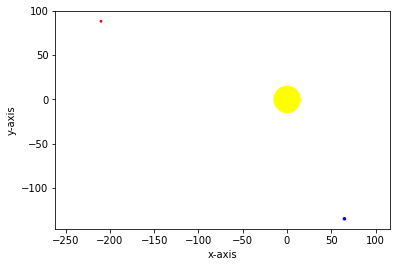

(['moon', 'earth', 'sun', 'mars'],
 matrix([[  65.19720435,   64.84689438,    0.        , -210.10068849],
         [-134.97309724, -134.81483705,    0.        ,   88.29558707],
         [   1.        ,    1.        ,    1.        ,    1.        ]]))

In [3]:
names, loc = Robot_Simulator(time_days=300, show=True)
names, loc

&#9989; <font color=red>**Question 1.a**</font>: Consider the state of the system shown at day=300.  Calculate the  distance between mars and the earth?

In [4]:
np.linalg.norm(np.array(loc[:,0])-np.array(loc[:,1]))

&#9989; <font color=red>**Question 1.b:**</font>: Consider the $A_2$ matrix in the code above (show here again so you don't need to scroll).  Is this matrix linearly independent? Explain how you got to your answer.

In [5]:
time_days = 300
moon_orbit = time_days/27 * (2*np.pi)
D2 = 149.6 #(Earth to Sun)

#Rotate moon and around earth and Transform Earth to Sun
A2 = np.matrix([[np.cos(moon_orbit), -np.sin(moon_orbit), D2 ], 
                [np.sin(moon_orbit), np.cos(moon_orbit),  0 ], 
                [0, 0, 1]]) 

In [6]:
# Yes !
sym.Matrix(A2).rref()

⎛⎡ 1    0   0⎤           ⎞
⎜⎢           ⎥           ⎟
⎜⎢ 0    1   0⎥, (0, 1, 2)⎟
⎜⎢           ⎥           ⎟
⎝⎣0.0  0.0  1⎦           ⎠

&#9989; <font color=red>**Question 1.c**</font>: The matrices $A_1$, $A_2$, and $A_3$ form a basis transform from the moon coordinates ($m$) to the Sun's coordinates ( $s = A_1A_2A_3m$).  The matrices $B_1$ and $B_2$ form a basis transform from Mars coordinates ($r$) to the Sun's coordinates ( $s = B_1B_2r$). Show how you would combine these matrices to create a new matrix $C$ which is the basis transform from Mars to moon coordinates.  NOTE: we used $r$ for the mars point since $m$ was already taken.  

$$s = A_1A_2A_3m$$
$$s = B_1B_2r$$
$$ C = (A_1A_2A_3)^{-1}B_1B_2 $$
$$ m = Cr $$

&#9989; <font color=red>**Question 1.d:**</font>: Assuming you calculated $C$ correctly above, write the equation to convert from moon coordinates ($m$) to Mars coordinates ($r$).

$$r = C^{-1}m$$

&#9989; <font color=red>**Question 1.e:**</font>: Explain why we use $3 \times 3$ matrices ($A_1$, $A_2$, $A_3$, $B_1$ and $B_2$) to model the 2 dimentional motion instead of $2 \times 2$ matrices.  In other words, what is the extra dimention used for?

Used for translations in x and y direction 

----

# Question 2 - (25 points)  Markov's Bookstore

<img src="https://lh6.googleusercontent.com/-7I7okWc7XvR6Wy3GPafHgPtGWkK9pQYbpwHMmFnXHhCsLMCt8qC_mLhMqDjO1kVJElnLQJd8A=w740">
Example motivated by (hint good resource if you are stuck): https://www.countbayesie.com/blog/2015/11/21/the-black-friday-puzzle-understanding-markov-chains

Consider the map of the book/gift store shown in the figure above. The store is shaped like a pentagon with each department on the outer edge.  To the right of the map we see a Markov state transition model that describes the probabilities of customers moving between departments. 

This probability model can be represented by the following matrix. 


In [7]:
# Here are some libraries you may need to use
%matplotlib inline
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
sym.init_printing(use_unicode=True)

In [8]:
names = ['Books', 'Childrens', 'Toys', 'Puzzles', 'Music']
         
A = np.matrix([[ 0.5,0.1, 0.1, 0.05,  0.2],
               [0.2, 0.3, 0.2, 0.15, 0.1],
               [ 0.15, 0.2,0.3, 0.3, 0.1], 
               [ 0.1,0.3, 0.2 ,0.4 ,0.1],
               [0.05,0.1 ,0.2,0.1,0.5]])
print(names)
sym.Matrix(A)

['Books', 'Childrens', 'Toys', 'Puzzles', 'Music']


⎡0.5   0.1  0.1  0.05  0.2⎤
⎢                         ⎥
⎢0.2   0.3  0.2  0.15  0.1⎥
⎢                         ⎥
⎢0.15  0.2  0.3  0.3   0.1⎥
⎢                         ⎥
⎢0.1   0.3  0.2  0.4   0.1⎥
⎢                         ⎥
⎣0.05  0.1  0.2  0.1   0.5⎦

&#9989; <font color=red>**Question 2.a:**</font> Assume the store opens and starts with exactly 50 people in each room and no one leaves or enters the store.  How many people does the Markov model predict will be in each department in exactly two time steps?

In [9]:
#C, D = sym.Matrix(A).diagonalize()
#C*D**2*C.inv()*sym.Matrix([[50],[50],[50],[50]])
A**2*sym.Matrix([[50],[50],[50],[50],[50]])

⎡ 46.0 ⎤
⎢      ⎥
⎢47.25 ⎥
⎢      ⎥
⎢53.625⎥
⎢      ⎥
⎢56.25 ⎥
⎢      ⎥
⎣46.875⎦

&#9989; <font color=red>**Question 2.b:**</font> Use ```numpy``` to calculate the eigenvalues and eigenvectors for the matrix $A$. Note some of these eigenvectors may have imaginary values.

In [10]:
vals, vecs = np.linalg.eig(A)
idx = vals.argsort()[::-1]   
vals = vals[idx]
vecs = vecs[:,idx]

&#9989; <font color=red>**Question 2.c:**</font> The eigenvector associated with the largest eigenvalue (we can call it $v$) represents the long term steady state probably of the system.  Rescale the vector $v$ into a new vector called $\bar{v}$ such that it's components represent probabilities that add to one.  In other words, calculate a constant $c$  such as the following is true:

$$v = [v_1,v_2,v_3,v_4,v_5]$$

$$\bar{v} = cv$$
Where $c$ above fulfills the following equalities:

$$\begin{align}
cv_1 + cv_2 + cv_3 + cv_4 + cv_5 &= \bar{v}_1 + \bar{v}_2 + \bar{v}_3 + \bar{v}_4 + \bar{v}_5\\
&= 1
\end{align}
$$



In [11]:
v = vecs[:,0].real
c = 1/v.sum()
vbar = c*v
vbar

matrix([[0.17900058],
        [0.18869644],
        [0.21670672],
        [0.22772852],
        [0.18786774]])

&#9989; <font color=red>**Question 2.d:**</font> Using $\bar{v}$ calculated above create a new $5 \times 5$ steady state matrix with $\bar{v}$ each of the five columns of the matrix.

$$ [ \bar{v}^T | \bar{v}^T | \bar{v}^T | \bar{v}^T | \bar{v}^T ] $$

In [12]:
ss = np.hstack((vbar,vbar,vbar,vbar,vbar))
ss

matrix([[0.17900058, 0.17900058, 0.17900058, 0.17900058, 0.17900058],
        [0.18869644, 0.18869644, 0.18869644, 0.18869644, 0.18869644],
        [0.21670672, 0.21670672, 0.21670672, 0.21670672, 0.21670672],
        [0.22772852, 0.22772852, 0.22772852, 0.22772852, 0.22772852],
        [0.18786774, 0.18786774, 0.18786774, 0.18786774, 0.18786774]])

&#9989; <font color=red>**Question 2.e:**</font> Assume the store opens and starts with exactly 50 people in each room and no one leaves or enters the store.  Using the Markov model, what is the long term steady state of the system.  i.e. how many people are likely to be in each room as time approaches infinity?

In [13]:
ss*np.matrix([[50],[50],[50],[50],[50]])

matrix([[44.75014502],
        [47.17411121],
        [54.1766802 ],
        [56.93212895],
        [46.96693462]])

---

# Question 3 - (25 points) Symmetric Positive-Definite Matrices

<img src="https://cdn-images-1.medium.com/max/1600/1*OE32XelHMmsXZpBJISmweQ.jpeg" width=400 height=400>

<a href="https://en.wikipedia.org/wiki/Positive-definite_matrix">Positive-Definite Matrices</a> arise throughout Machine Learning, particularly in methods where Kernel Matrices arise, like Support Vector Machines. This is fortunate, as these matrices possess useful properties. In this series of questions, we will discover some of them. Let's begin by reminding ourselves of some truths.

**Definition**: $A$ is a Symmetric Positive-Definite Matrix which means it has the following properties:
- $A$ is square i.e. $A\in\mathbb{R}^{n \times n}$
- $A$ is full rank
- $A$ is symmetric i.e. $A^{T}=A$
- $x^{T}Ax>0$ for $x\in\mathbb{R}^{n}$

In [14]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing(use_unicode=True)

&#9989; <font color=red>**Question 3.a**</font>: Since $A$ is full rank and square, it has an *Eigenvalue Decomposition*, $X\Lambda X^{-1}$. *What are the columns of $X$, and what are the entries of $\Lambda$*?

columns are eigenvectors, $\Lambda$ entries of eigenvalues along diag

&#9989; <font color=red>**Question 3.b**</font>: Show that Positive-Definite Matrix $A$ can't have any negative eigenvalues. i.e. Show that if $x_i$ is an eigenvector of $A$ and $\lambda_i$ is an eigenvalue of $A$ then $\lambda_i$ must be positive. 

To be positive definite $x^\top A x >0$, since always $x^\top x >0$, $A$ must consist of only positive eigenvalues for the condition $x^\top A x >0$ to be met


&#9989; <font color=red>**Question 3.c:**</font>: Suppose $\lambda_{1},\lambda_{2}$ are distinct eigenvalues of $A$ (i.e., $\lambda_{1}\neq\lambda_{2}$, and $x_{1}$ and $x_{2}$ are the associated eigenvectors (e.g., $Ax_{i}=\lambda_{i}x_{i}$). Use the following equality to *explain why the eigenvectors must be orthogonal*. 

$$\begin{align}
\lambda_{1}x_{2}^{T}x_{1} &= x_{2}^{T}\lambda_{1}x_{1} \\
&= x_{2}^{T}Ax_{1}, \quad (\text{by the definition of an eigenvalue}) \\
&= (x_{2}^{T}Ax_{1})^{T}, \quad (\text{since this expression is just a real number}) \\
&= x_{1}^{T}A^{T}x_{2}, \quad (\text{by properties of the transpose}) \\ 
&= x_{1}^{T}Ax_{2}, \quad (\text{by symmetry of }A) \\
&= x_{1}^{T}\lambda_{2}x_{2} \\
&=\lambda_{2}x_{1}^{T}x_{2} \\
\end{align}
$$

In other words, taking the first and last expressions:

$$\begin{align}
\lambda_{1}x_{2}^{T}x_{1} &=\lambda_{2}x_{1}^{T}x_{2} \quad (1)\\
\end{align}
$$

But!

$$\lambda_{1}\neq\lambda_{2} \quad (2)$$

And

$$\begin{align}
x_{2}^{T}x_{1}&=x_{1}^{T}x_{2} \quad (3)\\
\end{align}
$$

Hence, the eigenvectors of distinct eigenvalues must be orthogonal, because...

Then (3) is equal to zero so that (1) is true in light of (2). All because orthoginal vectors dot product is zero. 

&#9989; <font color=red>**Question 3.d:**</font>: Turns out that for any real invertible matrix $B$, the product $B^TB$ is a Symmetric positive definite matrix. Using `numpy`, compute the Eigenvalue Decomposition of the Symmetric Positive-Definite Matrix `A` (given below).

In [15]:
B = np.matrix([[1,2,3,11],[4,5,6,12],[7,9,8,13]])
A = B.T*B

In [16]:
vals, vecs = np.linalg.eig(A)
vecs

matrix([[ 0.29175527,  0.5167551 , -0.79753895,  0.10851108],
        [ 0.38325062,  0.55673694,  0.41838109, -0.6067291 ],
        [ 0.39318331,  0.26074918,  0.41838109,  0.77612758],
        [ 0.78320158, -0.59583387, -0.11766968, -0.13315829]])

&#9989; <font color=red>**Question 3.e:**</font>: Using the Eigenvalue Decomposition of matrix `A` above, show via computation that the eigenvectors are, indeed, orthogonal.

In [17]:
print(np.isclose(vecs[:,0].T*vecs[:,1],0).all())
print(np.isclose(vecs[:,0].T*vecs[:,2],0).all())
print(np.isclose(vecs[:,0].T*vecs[:,3],0).all())
print(np.isclose(vecs[:,1].T*vecs[:,2],0).all())
print(np.isclose(vecs[:,1].T*vecs[:,3],0).all())
print(np.isclose(vecs[:,2].T*vecs[:,3],0).all())


True
True
True
True
True
True


**Put your answer to the above question here.**

----
# Question 4 - (25 points) Cryptography 
<img src="https://3b6xlt3iddqmuq5vy2w0s5d3-wpengine.netdna-ssl.com/state-of-security/wp-content/uploads/sites/3/shutterstock_509910508-800x450.jpg" width=50%>

In this problem we are going to write some code to encrypt and decrypt message using linear algebra and inverse functions. We will represent the message as a matrix $m$ and the encrypted (secret) message as $s$.    We will also define an encryption matrix $A$ and a decryption matrix $B$ such that:

$$s=Am$$

$$m=Bs$$

**Step 1 (letters to numbers):** The first step is to convert our message string into a list of numbers and be able to take a list of numbers and convert it back into a string. For example;  A=0, B=1, C=2, etc. The following functions use an existing letter to number encoding called ASCII so it includes uppercase letters, lowercase letters, numbers and many symbols.

In [18]:
# Here are some libraries you may need to use
%matplotlib inline
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
sym.init_printing(use_unicode=True)

In [19]:
def str2numlist(s):
    """Convert a string to a list of numbers"""
    n = [ord(c)-ord('A') for c in s]
    return n

def numlist2str(n):
    """Convert list of numbers to a string"""
    s = [chr(c+ord('A')) for c in n]
    s = ''.join(s)
    return s

The following code demonstrates how these functions are used:

In [20]:
message='abcdeABCDE'
num_message = str2numlist(message)
print(num_message)

[32, 33, 34, 35, 36, 0, 1, 2, 3, 4]


In [21]:
message = numlist2str(num_message)
print(message)

abcdeABCDE


**Step 2 (message as a matrix):** Now we need our number list to be in a matrix format.  The size of our message matrix depends on the size of our square encryption matrix $A$.   For this problem lets assume $A$ is a $4x4$ square matrix. This means that our message matrix should be $4 x l$, where length $l$ changes in size depending on the size of the message.

The following functions use the ```str2numlist``` and ```numlist2str``` functions from above to convert our message strings into a message matrix $m$ and our message matrix $m$ back to a string. 

In [22]:
def message2mat(message, spacing=4):
    """Add extra spaces to message and turn into numpy matrix of size 4x(N%4)"""

    message_len = len(message)
    extra_spaces = spacing - message_len % spacing
    message = message.ljust(len(message) + extra_spaces)
    num_message = str2numlist(message)
    message_mat=np.matrix(np.reshape(num_message, (spacing,-1)))
    return message_mat

def mat2message(message_mat):
    try:
        """Unroll a numpy matrix into a list of numbers"""
        # found this here https://stackoverflow.com/questions/5183533/how-to-make-list-from-numpy-matrix-in-python
        num_message = np.round(np.array(message_mat).reshape(-1,)).astype(int).tolist()
        message = numlist2str(num_message)
        message = message.strip()
    except:
        raise Exception('Invalid Message Matrix!!!!')
        
    return message

The following code demonstrates how these functions are used:

In [23]:
m = message2mat(message)
m

matrix([[ 32,  33,  34],
        [ 35,  36,   0],
        [  1,   2,   3],
        [  4, -33, -33]])

In [24]:
message = mat2message(m)
message

'abcdeABCDE'

**Step 3 (encrypt message):** Now that we have a message as a matrix we can multiply that matrix by our encryption matrix $A$ which is defined as follows:

In [25]:
A = np.matrix([[ -18, 9, 10, 11], [ 7, -4, 3, 2], [14, -4, 6, 6], [9, 80, 3, -9]])
sym.Matrix(A)

⎡-18  9   10  11⎤
⎢               ⎥
⎢ 7   -4  3   2 ⎥
⎢               ⎥
⎢14   -4  6   6 ⎥
⎢               ⎥
⎣ 9   80  3   -9⎦

<font color=red>**Question 4.a:**</font> Apply $A$ to the message matrix $m$ and store the results in a new matrix $s$. 

In [26]:
s = A*m

**Step 4 (Decrypt the message):** In order to decrypt your message your friends will already need the decryption matrix $B$.

<font color=red>**Question 4.b:**</font> Generate the decryption matrix $B$

In [27]:
B = np.linalg.inv(A)

<font color=red>**Question 4.c:**</font> Now apply the Decryption matrix $B$ to our encrypted message $s$ and pass the resulting matrix into ```mat2message``` to see the original message

In [28]:
mat2message(B*s)

'abcdeABCDE'

<font color=red>**Question 4.d:**</font> The following message was encrypted using matrix $A$ from above. What is the message?

In [29]:
secret_message = [[ 1055,  -121,  -401,  -680,   331,  1375, -1348,   -35,  -278, 1222,  -868, -1048,   262,  1252,  -479,  -154,  -186,  -369, -1070],
                  [ 239, 619,   306,   232,   441,   -69,   554,   603,   627, -1,   382,   429,   565,   129,   269,    84,   193,   187, 501],
                  [ 720,  1182,   554,   576,  1044,   -52,   910,  1228,  1254, 16,   614,   800,  1266,   216,   630,   288,   508,   452, 804],
                  [ 2974, -2493,   901,   978,  1542,  -184, -1743,  -910,  -965, -1544,  -945, -2658,   763, -3204,  3999,  4364,  4588,  3654, -1818]]

In [30]:
mat2message(B*secret_message)

'Thank you for taking CMSE 314, I hope you learned something and had fun!!'

<font color=red>**Question 4.e:**</font> Compose your own secret message (minimum 10 characters long) to the instructor using the above encoding matrix $A$.  Make sure you print your original message string, the original message matrix, and the secret message matrix.  Include code to check and verify that the message can be decoded using the $B$ matrix. 

In [31]:
m2 = 'I learned a lot, thank you!!'
mm2 = message2mat(m2)
s2 = A*mm2
m2d = B*s2
mat2message(m2d)

'I learned a lot, thank you!!'

---------
### Congratulations, you're done with your EXAM

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's dropbox.

&#9989; <font color=red>**DO THIS:**</font>
- In the "Kernel" menu above, select "Restart and Run All".  and make sure your answers still match what you expect. This will ensure you didn't do anything out of order by mistake.
- Download the Notebook to your desktop with the filename using the format **"<NETID\>_Final-Exam.ipynb"**.  Replace <NETID\> in the filename with your personal MSU NetID (the stuff that comes before the @ symbol in your msu email address).
- Upload the newly renamed notebook to the D2L dropbox. 


&#169; Copyright 2018,  Michigan State University Board of Trustees